In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from utils import get_data_train, get_columns

In [3]:
df = get_data_train()
activity_labels = df['activity']
chosen_cols = get_columns(df, n_cols=25)
X_chosen = df[chosen_cols]
X_full = df.drop(['activity', 'subject'], axis=1)

In [4]:
def visualize(X, labels, title, vis_tool, ax=None, **kwargs):
    # vis tool = PCA or TSNE, **kwargs: for example random_state for TSNE
    vis_tool = vis_tool(n_components=2, **kwargs)
    res = vis_tool.fit_transform(X)
    res_labels = pd.DataFrame(np.column_stack((res,labels)),
                 columns=['X', 'Y', 'label'])
    if ax is None:
        ax = plt.figure(figsize=(10,8))
        no_return = False
    else:
        no_return = True
    sns.scatterplot(data=res_labels, x='X', y='Y', hue='label', style='label')
    plt.title(title)
    if no_return:
        return
    return ax

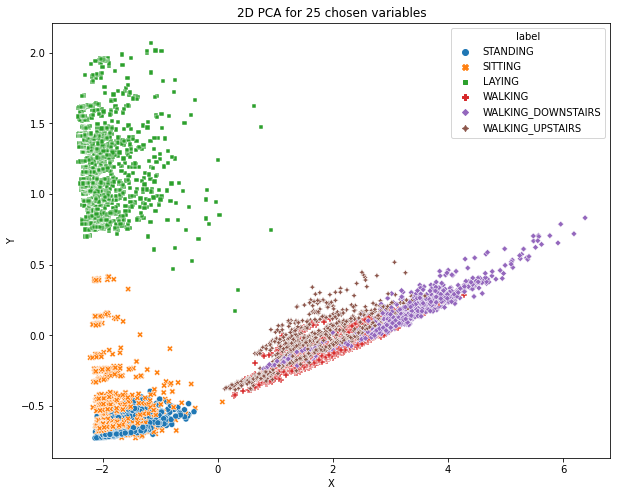

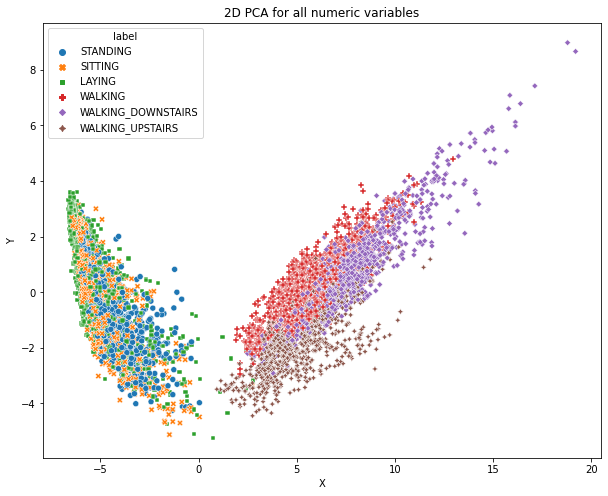

In [4]:
ax = visualize(X_chosen, activity_labels, '2D PCA for 25 chosen variables', PCA)
plt.show()
ax = visualize(X_full, activity_labels, '2D PCA for all numeric variables', PCA)
plt.show()

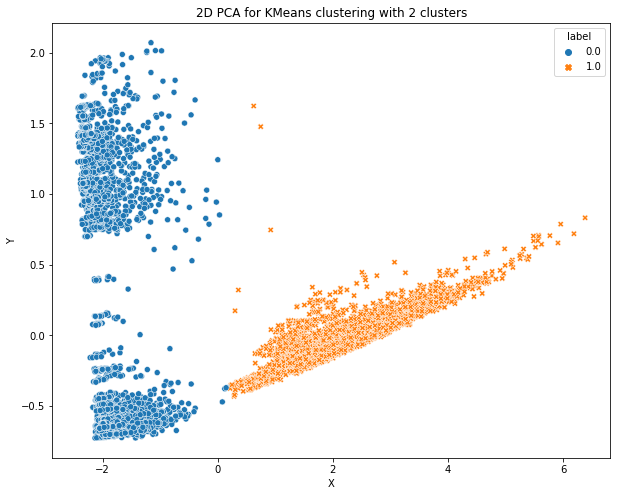

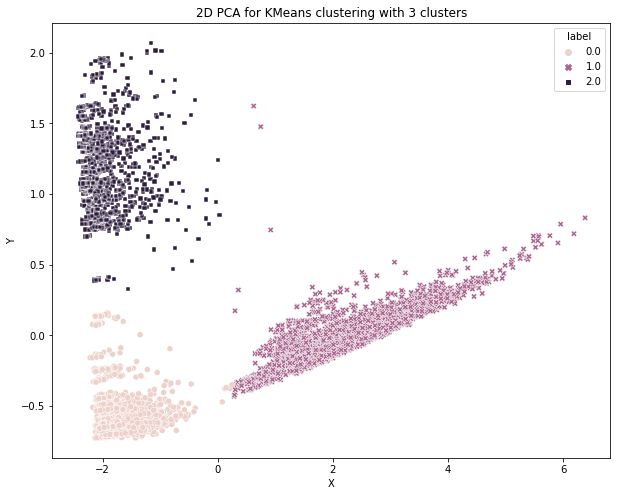

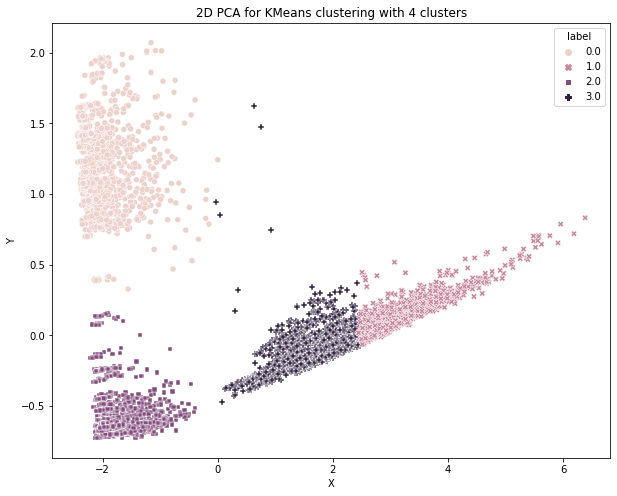

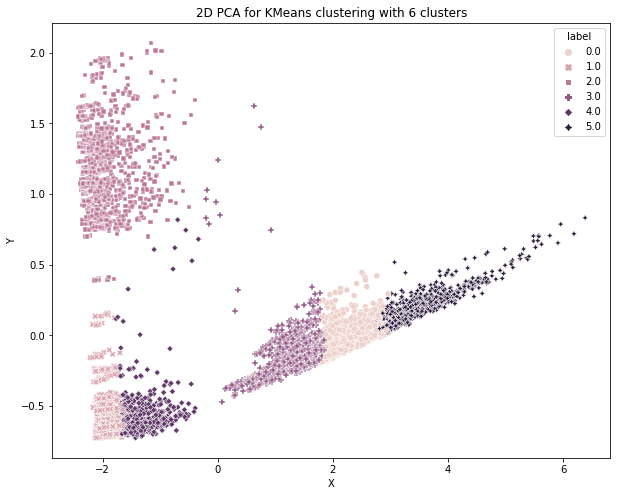

In [5]:
n_clusters = [2,3,4,6]
for n in n_clusters:
    kmeans = KMeans(n_clusters=n)
    clusters = kmeans.fit_predict(X_chosen)
    ax = visualize(X_chosen, clusters, 
                       '2D PCA for KMeans clustering with ' + str(n) + ' clusters', PCA)
    plt.show()

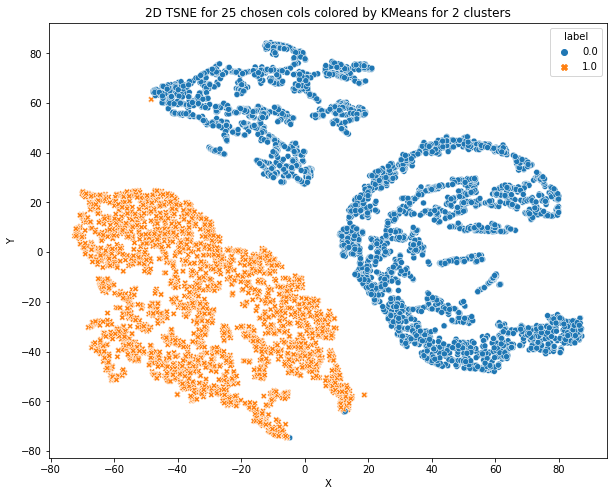

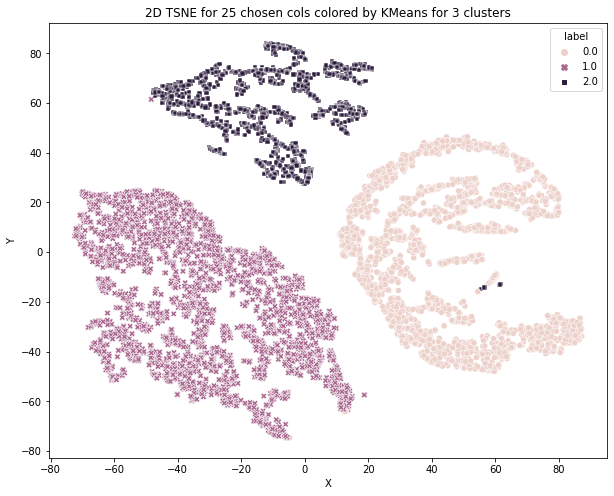

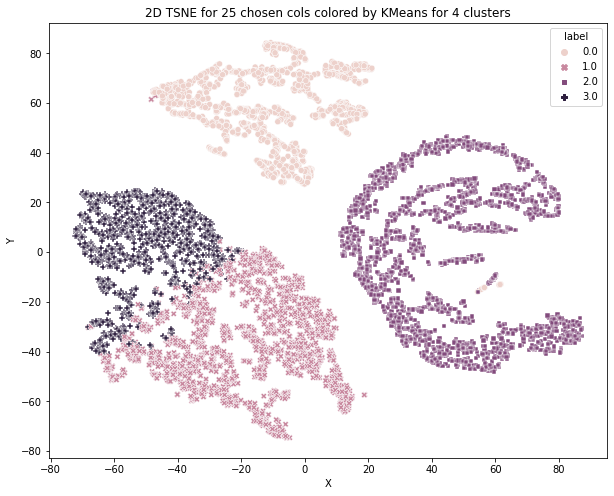

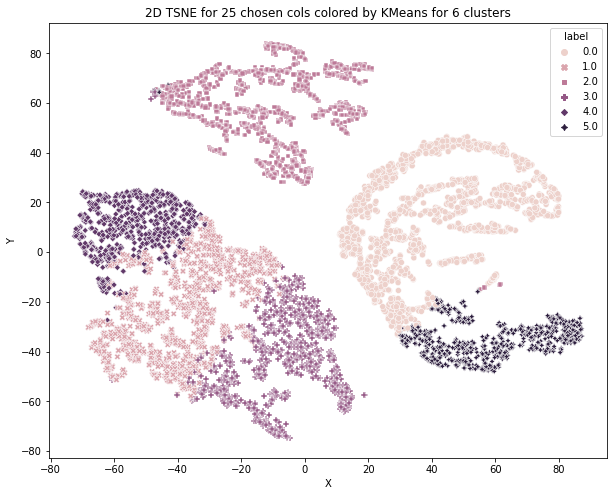

In [6]:
n_clusters = [2,3,4,6]
for n in n_clusters:
    kmeans = KMeans(n_clusters=n)
    clusters = kmeans.fit_predict(X_chosen)
    ax = visualize(X_chosen, clusters, 
                       '2D TSNE for 25 chosen cols colored by KMeans for ' + str(n) + ' clusters',
                   TSNE, random_state=123)
    plt.show()

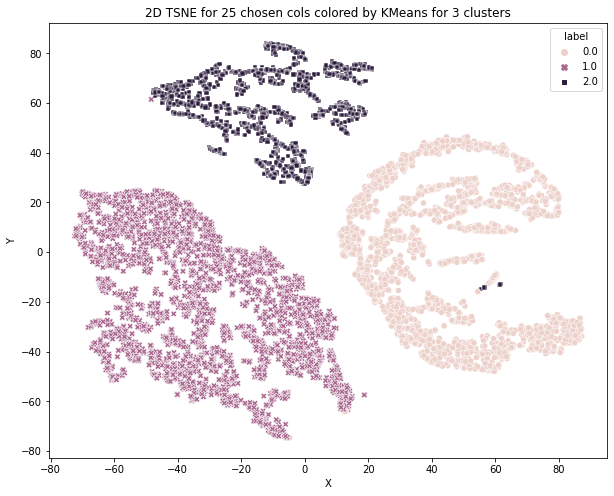

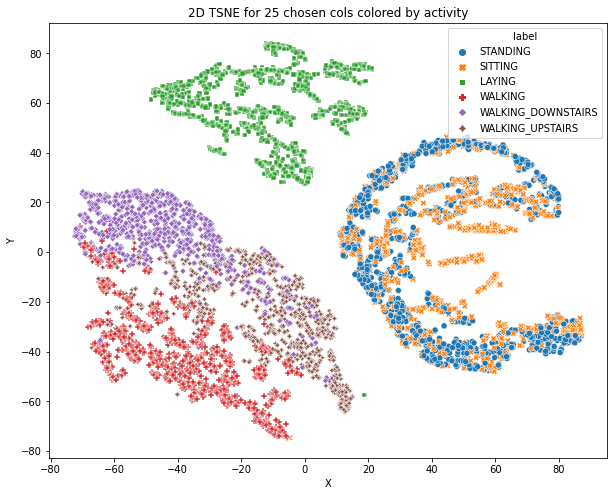

In [7]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X_chosen)

visualize(X_chosen, clusters, 
    '2D TSNE for 25 chosen cols colored by KMeans for ' + str(3) + ' clusters', TSNE, random_state=123, n_jobs=-1)
plt.show()
visualize(X_chosen, activity_labels, 
    '2D TSNE for 25 chosen cols colored by activity', TSNE, random_state=123, n_jobs=-1)
plt.show()

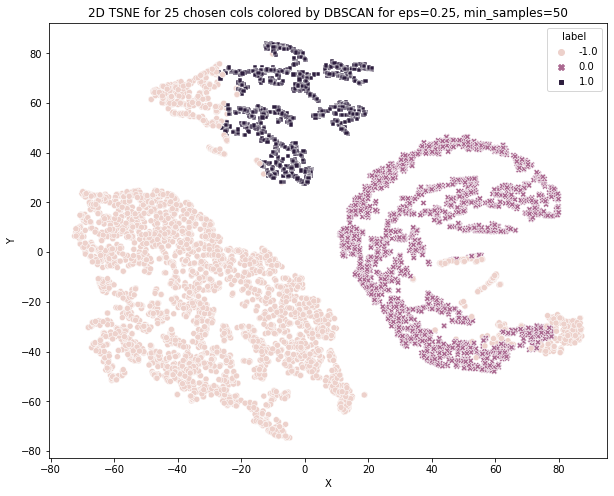

In [11]:
dbscan = DBSCAN(eps=0.15, min_samples=50)
clusters = dbscan.fit_predict(X_chosen)

visualize(X_chosen, clusters, 
    '2D TSNE for 25 chosen cols colored by DBSCAN for eps=0.25, min_samples=50', TSNE, random_state=123, n_jobs=-1)
plt.show()

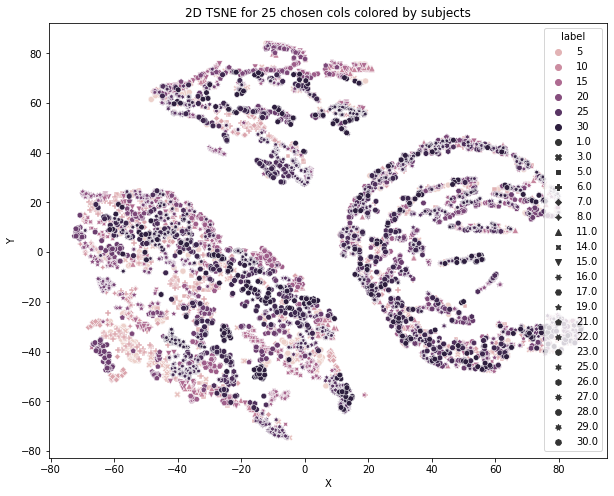

In [5]:
visualize(X_chosen, df['subject'], 
    '2D TSNE for 25 chosen cols colored by subjects', TSNE, random_state=123, n_jobs=-1)
plt.show()